# Q-Learning (Crawling Robot)

#### References
* https://www.youtube.com/watch?v=F-kNXAFeffs
* https://www.youtube.com/watch?v=bVbT9zkPIvs
* https://github.com/Rosebotics/ev3dev-curriculum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from crawler_lego_env import CrawlingRobotEnv
from agent import Q_Agent

try:
    from pybricks.tools import print
    running_on_lego = True
except ModuleNotFoundError:
    running_on_lego = False

# Number seem to converge in simulation
num_iterations_train = 400
# Bigger values decay faster
e_greedy_decay = 1. / num_iterations_train
# Initial agent action probability (just try things at random)
initial_e_greedy_prob = 1.0
# Number of iterations before check statitics of reward
num_steps_eval = num_iterations_train//10

Running on PC


#### Create Environment

In [2]:
env = CrawlingRobotEnv(invert_reward=False, run_on_lego=running_on_lego, step_angle=45)
current_state = env.reset()

### Action and State space before training

In [3]:
# Get the action space
print('Robot action space:', env.action_space)
print('Robot state-space:', env.observation_space)
print('Reset State:', current_state)

Robot action space: 6
Robot state-space: 9
Reset State: 0


#### Create Agent

In [4]:
agent = Q_Agent(env, gamma=0.9, alpha=0.2, e_greedy_prob=initial_e_greedy_prob, e_greedy_decay=e_greedy_decay)

##### Agent Internal Action-Space table

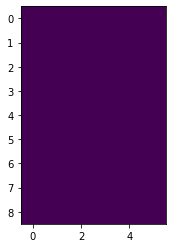

In [5]:
plt.imshow(agent.q_val_table)
plt.show()

#### Training

In [6]:
# Train
sum_rewards = 0
sum_rewards_vec = []
probabilities_vec = []
for steps in range(num_iterations_train):
    action = agent.choose_action(current_state)
    current_state_str = str(env)
    next_state, reward, done, info = env.step(action)
    next_state_str = env.state_idx_to_str(next_state)
    action_str = env.action_idx_to_str(action)
    agent.update_q_table(current_state, action, reward, next_state)
    #print('steps:', steps, '\n\tcurrent_state:', current_state_str, '\n\tACTION:', action_str, '\n\tnext_state:',
    #      next_state_str, '\n\treward:', reward, '\nprob:', agent.e_greedy_prob)
    #print('-' * 20)
    # Don't forget to update your state otherwise the robot will be stuck
    current_state = next_state
    # Accumulate rewards
    sum_rewards += reward
    probabilities_vec.append(agent.e_greedy_prob)
    if steps % num_steps_eval == 0:
        sum_rewards_vec.append(sum_rewards)
        print('\t\t*******Sum of rewards in %d steps: %d' % (num_steps_eval, sum_rewards))
        sum_rewards = 0

		*******Sum of rewards in 40 steps: -40
Experience: (2, 0) not recorded
		*******Sum of rewards in 40 steps: -453
Experience: (1, 0) not recorded
		*******Sum of rewards in 40 steps: -634
		*******Sum of rewards in 40 steps: -434
		*******Sum of rewards in 40 steps: -422
		*******Sum of rewards in 40 steps: -254
Experience: (1, 1) not recorded
		*******Sum of rewards in 40 steps: -183
Experience: (1, 1) not recorded
		*******Sum of rewards in 40 steps: -121
		*******Sum of rewards in 40 steps: -146
Experience: (1, 1) not recorded
		*******Sum of rewards in 40 steps: -115
Experience: (1, 0) not recorded


#### Some Training Statistics

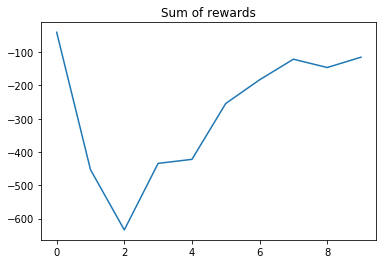

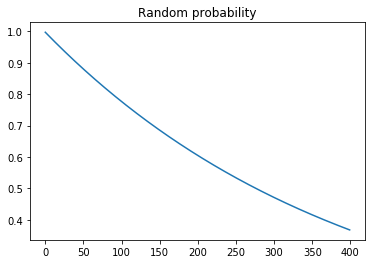

In [7]:
plt.plot(sum_rewards_vec)
plt.title('Sum of rewards')
plt.show()
plt.plot(probabilities_vec)
plt.title('Random probability')
plt.show()

#### Action-Space after training

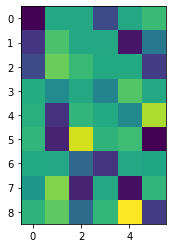

In [8]:
#agent.q_val_table = [[-13.58984620840813, 0.2187536492376747, 0.0963667182103613, -13.11274392636312, 0.6787333128779888, 2.953700736414834], [-11.7068865942528, 0.0269698545074915, 0.3267419239160485, 2.598730462640862, -9.523228199268605, -1.494831953993251], [-14.26528710733199, 0.9117472314216489, 2.080126795991999, 0.4473703673047298, 0.6600991679602686, -17.41762065068228], [2.21749490990893, 0.0, 0.0, -3.712551492626162, 0.0, 0.0], [0.0, -7.2, 0.036711261503015, 0.8483575436503623, 0.0, 0.0], [-0.2871126783999999, -7.024250699074725, 4.877072568769774, 0.0, 0.0, -11.63225069907473], [1.253523642818695, 0.0, -7.175987067525121, -4.0, 0.006351971788800003, -0.6241312772028415], [-0.01896386718846244, 0.2743854049288826, -7.2, -5.086298502026589, -9.582460613680484, -1.492714020178519], [1.614901162638076, 0.394841019154007, -9.423567353490917, 1.28, 6.895296534571973, -10.26855750043806]]
plt.imshow(agent.q_val_table)
plt.show()

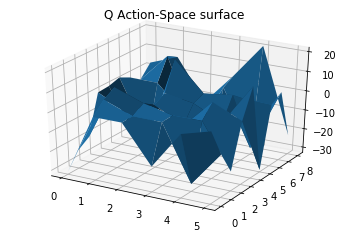

In [9]:
# Convert 2D list to numpy array
q_val_table = np.array(agent.q_val_table)
nx, ny = q_val_table.shape[1], q_val_table.shape[0]
x = range(nx)
y = range(ny)
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ha.plot_surface(X, Y, q_val_table)
plt.title('Q Action-Space surface')
plt.show()

#### Evaluate

In [10]:
agent.e_greedy_prob = 0
sum_rewards = 0
for steps in range(num_steps_eval):
    # Greedly run actions without learn anymore
    current_state_str = str(env)
    action = agent.choose_action(current_state)
    next_state, reward, done, info = env.step(action)
    action_str = env.action_idx_to_str(action)
    next_state_str = env.state_idx_to_str(next_state)
    print('steps:', steps, '\n\tcurrent_state:', current_state_str, '\n\tACTION:', action_str, '\n\tnext_state:',
          next_state_str, '\n\treward:', reward, '\nprob:', agent.e_greedy_prob)
    print('-' * 20)
    sum_rewards += reward
    # Don't forget to update your state otherwise the robot will be stuck
    current_state = next_state
    # Accumulate rewards
    sum_rewards += reward
print('Sum of rewards in %d steps: %d' % (num_steps_eval, sum_rewards))

steps: 0 
	current_state: leg:UP feet:DOWN 
	ACTION: leg DOWN idx:2 
	next_state: leg:DOWN feet:DOWN 
	reward: 0 
prob: 0
--------------------
steps: 1 
	current_state: leg:DOWN feet:DOWN 
	ACTION: feet UP idx:4 
	next_state: leg:DOWN feet:UP 
	reward: 13 
prob: 0
--------------------
steps: 2 
	current_state: leg:DOWN feet:UP 
	ACTION: leg UP idx:1 
	next_state: leg:UP feet:UP 
	reward: 0 
prob: 0
--------------------
steps: 3 
	current_state: leg:UP feet:UP 
	ACTION: feet DOWN idx:5 
	next_state: leg:UP feet:DOWN 
	reward: 0 
prob: 0
--------------------
steps: 4 
	current_state: leg:UP feet:DOWN 
	ACTION: leg DOWN idx:2 
	next_state: leg:DOWN feet:DOWN 
	reward: 0 
prob: 0
--------------------
steps: 5 
	current_state: leg:DOWN feet:DOWN 
	ACTION: feet UP idx:4 
	next_state: leg:DOWN feet:UP 
	reward: 13 
prob: 0
--------------------
steps: 6 
	current_state: leg:DOWN feet:UP 
	ACTION: leg UP idx:1 
	next_state: leg:UP feet:UP 
	reward: 0 
prob: 0
--------------------
steps: 7 
	cur